In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Kolumnit
abc = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [3]:
# .txt aikatiedostosta lista ajoista
def listFromTimeData(path):
    with open(path) as f:
        l = f.readlines()
    j = 0
    for c in l[1]:
        if c==':':
            break
        j += 1
    for i in range(len(l)):
        l[i]=float(l[i][j+2:j+7])
    return l

In [4]:
# Dataframe ajoista. columneilla kirjaimet
df = pd.DataFrame(columns=abc)

timeFiles = ['santeri1995.txt', 'santeri1987.txt', 'santeri1962.txt',
             'santeri1878.txt', 'santeri1865.txt', 'santeri1852.txt',
             'santeri1821.txt', 'santeri1785.txt', 'santeri1756.txt',
             'santeri1726.txt', 'santeri1686.txt', 'santeri1682.txt',
             'elias1699.txt', 'elias1639.txt']

for i in range(len(timeFiles)):
    df.loc[i] = listFromTimeData(timeFiles[i])
df.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.0,0.063,0.116,0.175,0.229,0.277,0.330,0.381,0.381,0.601,...,1.112,1.112,1.230,1.302,1.379,1.462,1.479,1.714,1.883,1.995
1,0.0,0.056,0.150,0.223,0.269,0.365,0.375,0.408,0.525,0.697,...,1.250,1.250,1.422,1.464,1.550,1.656,1.720,1.872,1.932,1.987
2,0.0,0.080,0.096,0.168,0.247,0.293,0.376,0.402,0.447,0.611,...,1.114,1.114,1.248,1.298,1.361,1.519,1.533,1.670,1.932,1.962
3,0.0,0.059,0.179,0.295,0.349,0.445,0.479,0.532,0.563,0.747,...,1.229,1.229,1.363,1.418,1.504,1.611,1.635,1.809,1.858,1.878
4,0.0,0.089,0.132,0.194,0.260,0.311,0.410,0.462,0.517,0.692,...,1.300,1.300,1.413,1.463,1.529,1.659,1.659,1.762,1.829,1.865


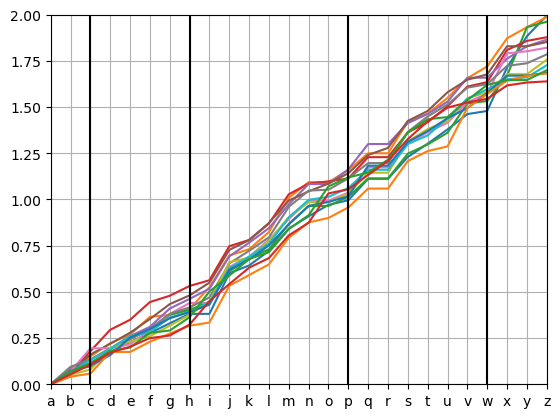

In [5]:
# Kaikki runit samassa plotissa

plt.plot(df.T)
#plt.plot(['a','z'], [0,1.7], color='black', linewidth=5, alpha=0.4)
plt.axvline(x = 'c', color = 'black')
plt.axvline(x = 'h', color = 'black')
plt.axvline(x = 'p', color = 'black')
plt.axvline(x = 'w', color = 'black')
plt.grid()
plt.ylim(0,2)
plt.xlim('a','z')
plt.show()

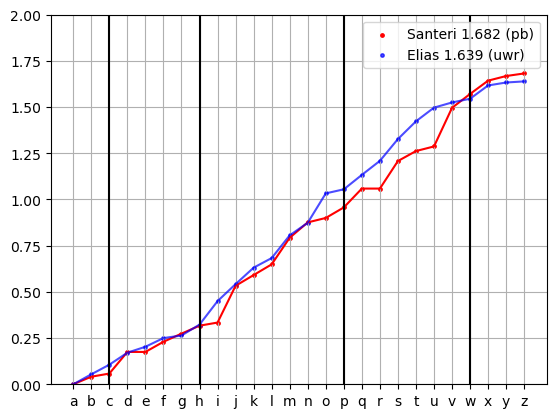

In [6]:
# Kiinnostavien runien vertailu

plt.scatter(abc, df.T[11], c='r', alpha=1, s=6, label='Santeri 1.682 (pb)')
plt.plot(df.T[11], alpha=1, c='r')

#plt.scatter(abc, df.T[8], c='green', alpha=0.7, s=6, label='Elias 1.699')
#plt.plot(df.T[8], alpha=0.7, c='green')

plt.scatter(abc, df.T[13], c='blue', alpha=0.7, s=6, label='Elias 1.639 (uwr)')
plt.plot(df.T[13], alpha=0.7, c='blue')

plt.ylim(0,2)

plt.axvline(x = 'c', color = 'black')
plt.axvline(x = 'h', color = 'black')
plt.axvline(x = 'p', color = 'black')
plt.axvline(x = 'w', color = 'black')

plt.grid()
plt.legend()
plt.show()

In [7]:
# Näppäinten erotus -dataframe

df_diff = pd.DataFrame(columns=abc[1:])

for i in range(len(timeFiles)):
    l = listFromTimeData(timeFiles[i])
    l2 = []
    for j in range(len(l)-1):
        l2.append(l[j+1]-l[j])
    df_diff.loc[i] = l2

# Jos haluaa tsekkaa running average
#df_diff_av3 = df_diff.T.rolling(3).mean().T

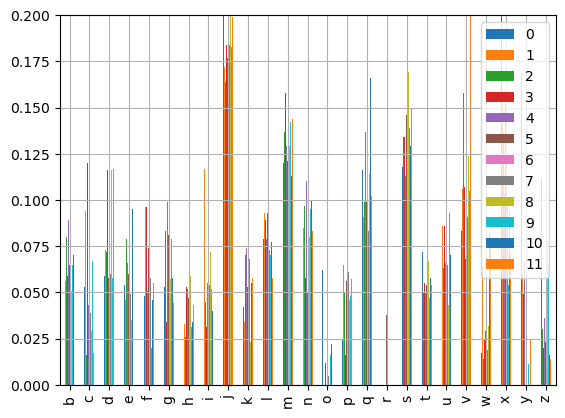

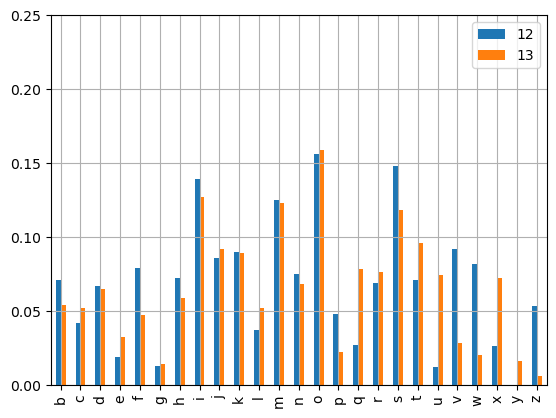

In [8]:
# Santeri kaikki ajat / kirjain
df_diff[:12].T.plot.bar()
plt.ylim(0,0.2)
plt.grid()
plt.show()

# Elias kaikki ajat / kirjain
df_diff[12:].T.plot.bar()
plt.ylim(0,0.25)
plt.grid()
plt.show()

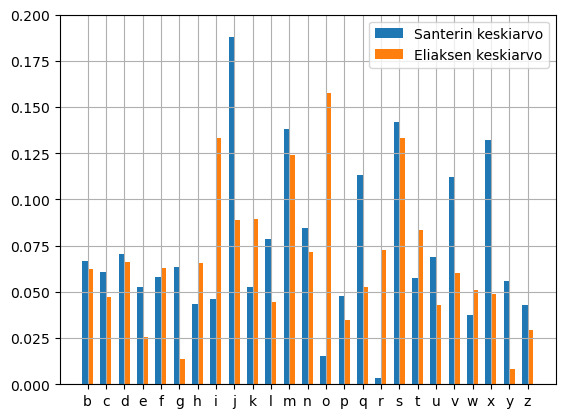

In [9]:
# Santeri vs Elias keskiarvoaika/kirjain

dfs = df_diff[:12].mean().T
dfe = df_diff[12:].mean().T

X = abc[1:]
X_axis = np.arange(25)
sep = 0.15

plt.bar(X_axis-sep, dfs, width=0.3, label='Santerin keskiarvo')
plt.bar(X_axis+sep, dfe, width=0.3, label='Eliaksen keskiarvo')
plt.xticks(X_axis, X)

plt.ylim(0,0.2)
plt.grid()
plt.legend()
plt.show()

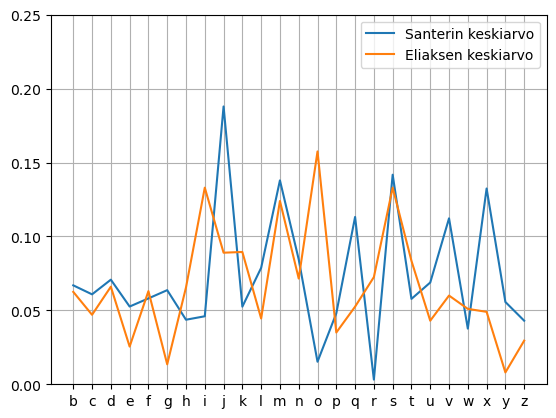

In [10]:
# Sama mutta normaali plotti (keskiarvoaika/kirjain)

plt.plot(dfs, label='Santerin keskiarvo')
plt.plot(dfe, label='Eliaksen keskiarvo')

plt.ylim(0,0.25)
plt.grid()
plt.legend()
plt.show()